In [1]:
#import all the packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
%matplotlib inline


In [49]:
# Create the control dataset
mu = 60
sigma = 20
d = {
    'Purchase':np.random.normal(mu,sigma,1000),
    'Click': np.random.randint(2, size = 1000)
}
df_control = pd.DataFrame(d)
df_control['group'] = 'Control'

#df_control.head()

In [50]:
# Create the treatment dataset
mu = 65
sigma = 20
d = {
    'Purchase':np.random.normal(mu,sigma,1000),
    'Click': np.random.randint(2, size = 1000)
}
df_treatment = pd.DataFrame(d)
df_treatment['group'] = 'Treatment'
#df_treatment.head()

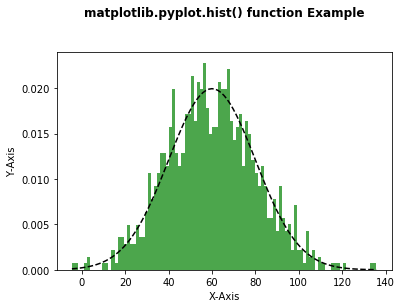

In [34]:
# Visualize the control mean
num_bins = 100
   
n, bins, patches = plt.hist(df_control.Purchase, num_bins, 
                            density = 1, 
                            color ='green',
                            alpha = 0.7)
   
y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mu))**2))
  
plt.plot(bins, y, '--', color ='black')
  
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
  
plt.title('matplotlib.pyplot.hist() function Example\n\n',
          fontweight ="bold")
  
plt.show()

In [51]:
# Concate the data
ab_test = pd.concat([df_control, df_treatment], axis = 0)
ab_test.reset_index(drop = True, inplace = True)

In [46]:
# Get the info and description
ab_test.info()
print("*"*60)
ab_test.groupby('group').describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Purchase  2000 non-null   float64
 1   Click     2000 non-null   int64  
 2   group     2000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 47.0+ KB
************************************************************


Purchase                                                        \
             count       mean        std       min        25%        50%   
group                                                                      
Control     1000.0  59.825317  20.557260 -4.579047  45.521921  59.356952   
Treatment   1000.0  64.682594  20.277621 -2.087522  51.302382  64.464958   

                                   Click                                       \
                 75%         max   count   mean       std  min  25%  50%  75%   
group                                                                           
Control    73.532151  135.724005  1000.0  0.534  0.499092  0.0  0.0  1.0  1.0   
Treatment  77.840175  135.483097  1000.0  0.488  0.500106  0.0  0.0  0.0  1.0   

                
           max  
group           
Control    1.0  
Treatment  1.0

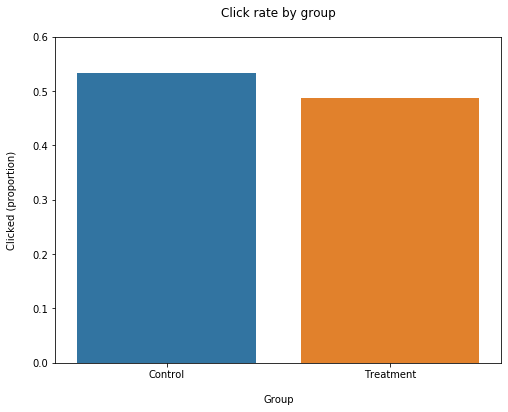

In [48]:
# Plot the click among groups
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['group'], y=ab_test['Click'], ci=False)

plt.ylim(0, 0.6)
plt.title('Click rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Clicked (proportion)', labelpad=15);

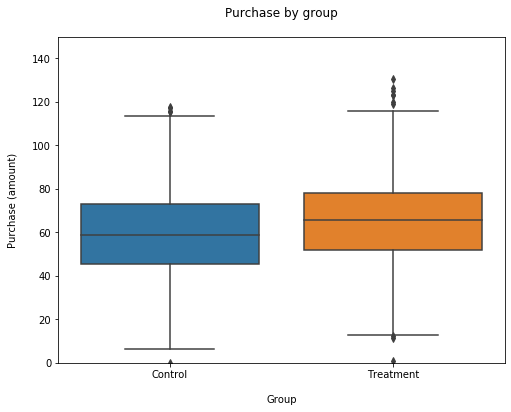

In [80]:
# Plot the average purchase among groups
plt.figure(figsize=(8,6))

sns.boxplot(x=ab_test['group'], y=ab_test['Purchase'], data = ab_test)

plt.ylim(0, 150)
plt.title('Purchase by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Purchase (amount)', labelpad=15);

In [66]:
# Zproportion test on Click Rate
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
significance = 0.05

control_results = ab_test[ab_test['group'] == 'Control']['Click']
treatment_results = ab_test[ab_test['group'] == 'Treatment']['Click']

n_con = control_results.count()
n_treat = treatment_results.count()

successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')
if pval > significance:
    print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
    print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

z statistic: 0.45
p-value: 0.654
ci 95% for control group: [0.493, 0.555]
ci 95% for treatment group: [0.483, 0.545]
Fail to reject the null hypothesis - we have nothing else to say


In [77]:
# T-test on Average purchase
from statsmodels.stats.weightstats import ttest_ind
significance = 0.05

control_results = ab_test[ab_test['group'] == 'Control']['Purchase']
treatment_results = ab_test[ab_test['group'] == 'Treatment']['Purchase']

t_stat, pval, df = ttest_ind(control_results, treatment_results)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
if pval > significance:
    print ("Fail to reject the null hypothesis - we have nothing else to say")
else:
    print ("Reject the null hypothesis - suggest the alternative hypothesis is true")

z statistic: 0.45
p-value: 0.000
Reject the null hypothesis - suggest the alternative hypothesis is true


In [78]:
ab_test.sample(n= 10)

,Purchase,Click,group
788,51.704283,0,Control
1144,59.344646,1,Treatment
840,49.468766,1,Control
985,42.731271,1,Control
1996,66.696528,1,Treatment
1587,68.452002,0,Treatment
1683,49.976979,0,Treatment
1577,59.973730,1,Treatment
219,57.840442,1,Control
747,45.364230,1,Control
